In [1]:
from maad import util, sound, spl
import matplotlib.pyplot as plt
from bird_behavior import empty_abundance_dataframe, bird_behavior, timeline_chart
from toolbox import addin, flatsound, waveread, bracket_ramp
from assemblage import singing_session
import pandas as pd
from pathlib import Path
import random
import soundfile

/media/haupert/data/mes_projets/_packages/scikit-maad.git/maad/util/miscellaneous.py:413: RuntimeWarning: divide by zero encountered in log10
  y = 10*log10(x)   # take log


<Axes: title={'center': 'Spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

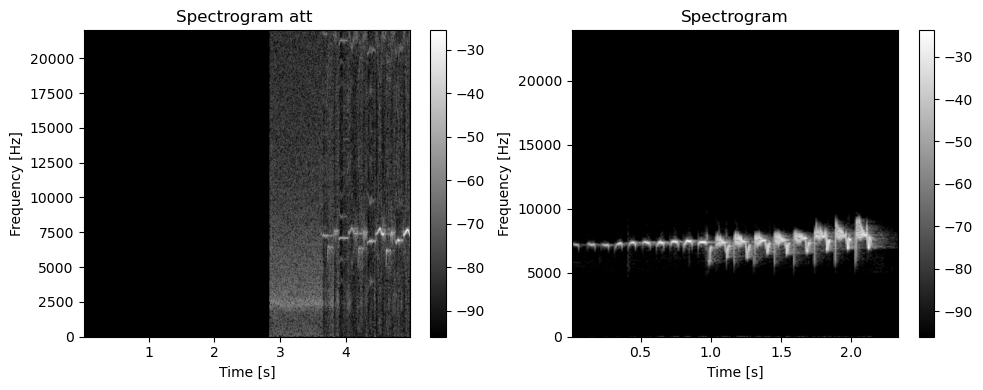

In [2]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

# load orignal sound
s_evascape, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/evascape_K_N06_gain24dB.wav')

Sxx, tn, fn, ext = sound.spectrogram(s_evascape, fs, nperseg=1024, noverlap=512, nfft=1024)  

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[0], title='Spectrogram att ')

# load and display spectrogram
s, fs = sound.load('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/MNHN-SO-2016-11232_full_0s_03.wav')
Sxx, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=512, nfft=1024)  

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[1], title='Spectrogram')

/media/haupert/data/mes_projets/_packages/scikit-maad.git/maad/util/miscellaneous.py:413: RuntimeWarning: divide by zero encountered in log10
  y = 10*log10(x)   # take log


<Axes: title={'center': 'Orignal Spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

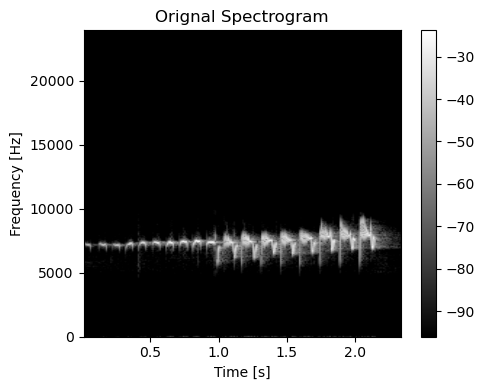

In [3]:
# load orignal sound
s, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/MNHN-SO-2016-11232_full_0s_03.wav')

# compute spectrogram
Sxx, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=512, nfft=1024)

# display spectrogram
util.plot_spectrogram(Sxx, ext, figsize=(3,5), title='Orignal Spectrogram')

<Axes: title={'center': 'Spectrogram with attenuation'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

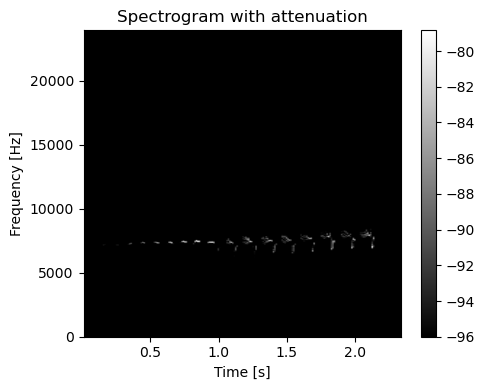

In [4]:
# apply attenuation
s_att = spl.apply_attenuation(s, fs,r0=1, r=150)

# compute spectrogram
Sxx_att, tn, fn, ext = sound.spectrogram(s_att, fs, nperseg=1024, noverlap=512, nfft=1024)

# display spectrogram
util.plot_spectrogram(Sxx_att, ext, figsize=(3,5), title='Spectrogram with attenuation')

In [5]:
# save attenuated sound
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/MNHN-SO-2016-11232_full_0s_03_att.wav', fs,s_att*100, 16)

# save attenuated sound after normalization to -10 dBFS
s_att_norm = sound.normalize(s_att, max_db=-10)
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/MNHN-SO-2016-11232_full_0s_03_att_norm.wav', fs,s_att_norm, 16)

# save original sound after normalization to -10 dBFS
s_norm = sound.normalize(s, max_db=-10)
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/MNHN-SO-2016-11232_full_0s_03_norm.wav', fs,s_norm, 16)


<Axes: title={'center': 'Spectrogram att + norm'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

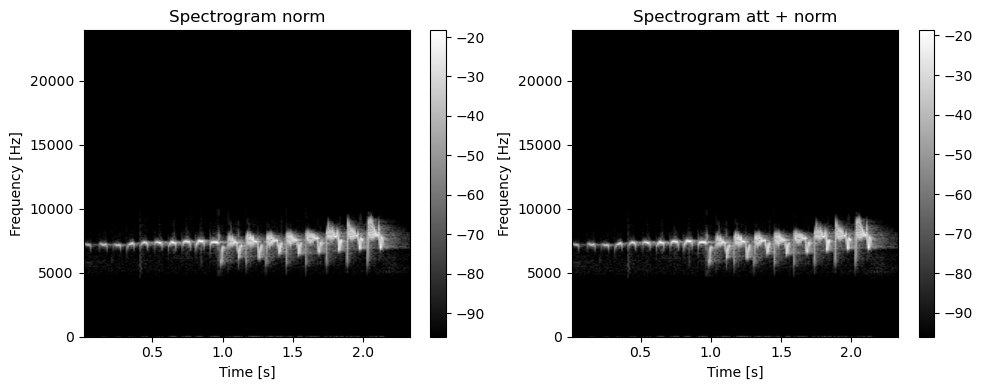

In [6]:
# load and display spectrogram
s, fs = sound.load('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/MNHN-SO-2016-11232_full_0s_03_norm.wav')
Sxx, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=512, nfft=1024)

# Create 2 subplots
fig, ax = plt.subplots(1,2, figsize=(10,4))

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[0], title='Spectrogram norm')

# load and display spectrogram
s, fs = sound.load('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/MNHN-SO-2016-11232_full_0s_03_att_norm.wav')
Sxx, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=512, nfft=1024)

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[1], title='Spectrogram att + norm')

In [88]:
# define the path to the sound files
SOUND_DIR = Path('../Evascape_soundfiles')

SAMPRATE = 44100
DURATION = 60

normch1_df = normsong_df = pd.read_csv(SOUND_DIR / 'bird_channel.csv', sep=';', index_col = 0)
normch2_df = pd.read_csv(SOUND_DIR / 'background_channel.csv', sep=';', index_col = 0)

# select in the index the files that contain the string : MNHN-SO-2016-11232_full_0s_03
normch1_df = normch1_df[normch1_df.index.str.contains('MNHN-SO-2016-11232_full_0s_03')]

normch1_df

,categories,min_f,min_t,max_f,max_t,source_fullfilename,source_filename,duration,duration_mean,duration_std,ist,ist_mean,ist_std,peak_amp,peak_ratio,species_dBSPL1m,song_fullfilename
song_filename,,,,,,,,,,,,,,,,,
MNHN-SO-2016-11232_full_0s_03_norm.wav,regreg,5343.75,43.498667,9468.75,45.76,C:\Users\ecoac-field\OneDrive\Documents\Articl...,MNHN-SO-2016-11232_full.wav,2.261333,2.509576,0.815334,3.093333,4.214427,1.426147,0.043917,0.78097,75.0,../Evascape_soundfiles/bird_channel/regreg/MNH...


In [89]:
#BIOPHONY DESCRIPTION
########
species_names = ['regreg']
abundance_df = empty_abundance_dataframe(normch1_df)
abundance_df.loc[species_names] = 1

abundance_df

,abundance
regreg,1


In [ ]:
#BEHAVIOR
#########

random.seed(333)
behavior_df = bird_behavior(normsong_df = normch1_df, 
                            abundance_df = abundance_df, 
                            d_min = 0, 
                            d_max = 100,
                            recording_duration = DURATION,  #behavior algorithm taken from Suzuki et al. 2012
                            all_random_ist = False, # does not take Suzuki's algorithm and makes all intersing intervals random instead
                            duplicate = False,
                            samprate = SAMPRATE)
timeline_chart(behavior_df, y_size = 0.5)
behavior_df

In [91]:
#SINGING SESSION
########
bird_list = list(behavior_df.bird_filename.unique())
species_list =[] 
for bird_filename in bird_list:
    species = behavior_df.categories[behavior_df.bird_filename == bird_filename].unique()[0]
    species_list += [species]
bird_df = pd.DataFrame(bird_list, index = species_list)

bird_df

,0
regreg,MNHN-SO-2016-11232_full.wav


<Axes: title={'center': 'Spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

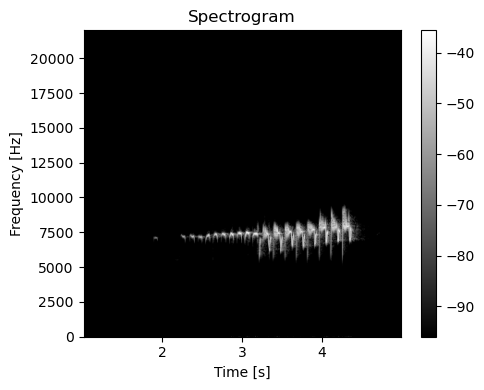

In [92]:
regreg_session = singing_session(behavior_df, bird_df.loc['regreg'][0], duration = DURATION, samprate = SAMPRATE)

# compute spectrogram
Sxx_regreg_session, tn, fn, ext = sound.spectrogram(regreg_session, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,5))

# display spectrogram
util.plot_spectrogram(Sxx_regreg_session, ext, figsize=(3,5), title='Spectrogram')

<Axes: title={'center': 'Spectrogram with attenuation'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

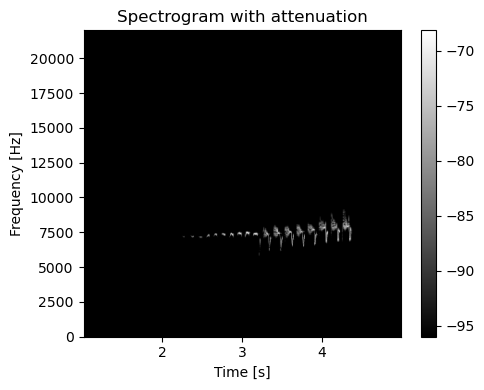

In [93]:
# apply attenuation
regreg_session_att = spl.apply_attenuation(regreg_session, fs, r0=1, r=25)

# compute spectrogram
Sxx_regreg_session_att, tn, fn, ext = sound.spectrogram(regreg_session_att, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,5))

# display spectrogram
util.plot_spectrogram(Sxx_regreg_session_att, ext, figsize=(3,5), title='Spectrogram with attenuation')

In [100]:
# save original sound
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session.wav',            SAMPRATE, regreg_session, 32)

# save original sound after normalization to -10 dBFS
regreg_session_norm = sound.normalize(regreg_session, max_db=-10)   
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_norm.wav',       SAMPRATE, regreg_session_norm, 32)

# save original sound with attenuation
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_att.wav',        SAMPRATE, regreg_session_att, 32)

# save original sound with attenuation after normalization to -10 dBFS
regreg_session_att_norm = sound.normalize(regreg_session_att, max_db=-10)
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_att_norm.wav',   SAMPRATE, regreg_session_att_norm, 32)

In [101]:
# save original sound
soundfile.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_soundfile.wav',          regreg_session,         SAMPRATE)

# save original sound after normalization to -10 dBFS
soundfile.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_norm_soundfile.wav',     regreg_session_norm,    SAMPRATE)

# save original sound with attenuation after normalization to -10 dBFS using soundfile package
soundfile.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_att_soundfile.wav',      regreg_session_att,     SAMPRATE)

# save original sound with attenuation after normalization to -10 dBFS using soundfile package
soundfile.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_att_norm_soundfile.wav', regreg_session_att_norm,SAMPRATE)

<Axes: title={'center': 'Spectrogram with soundfile'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

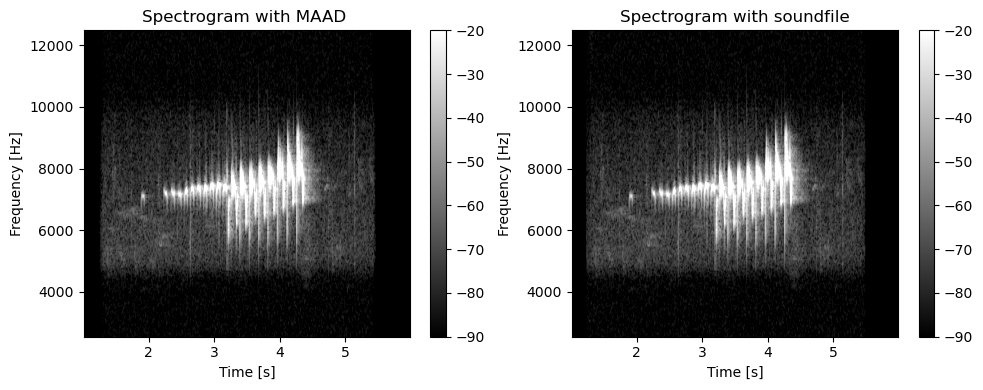

In [111]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

##### MAAD
# load orignal sound saveb with MAAD
s, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session.wav')

Sxx, tn, fn, ext = sound.spectrogram(s*100, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1, 6), flims=(2500,12500))  

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[0], title='Spectrogram with MAAD ', vmin=-90, vmax=-20)


##### SOUND FILE
# load and display spectrogram
s, fs = sound.load('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_soundfile.wav')

Sxx, tn, fn, ext = sound.spectrogram(s*100, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1, 6), flims=(2500,12500))  

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[1], title='Spectrogram with soundfile', vmin=-90, vmax=-20)

<Axes: title={'center': 'Spectrogram with soundfile'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

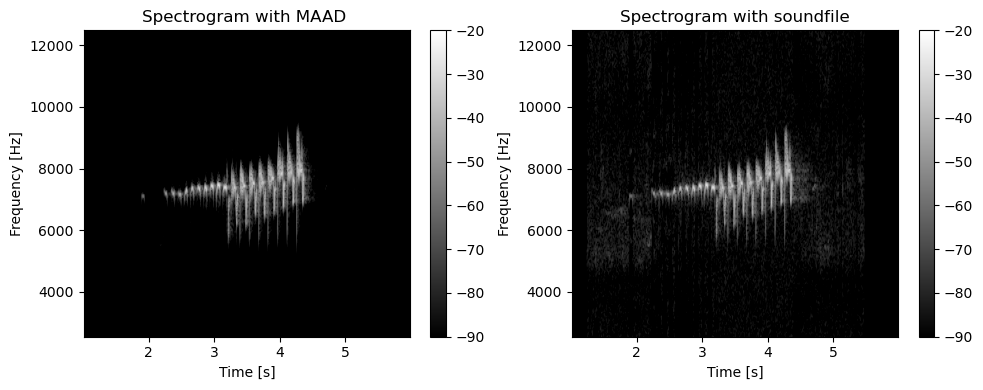

In [112]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

##### MAAD
# load orignal sound saveb with MAAD
s, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_att.wav')

Sxx, tn, fn, ext = sound.spectrogram(s*100, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1, 6), flims=(2500,12500))  

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[0], title='Spectrogram with MAAD ', vmin=-90, vmax=-20)


##### SOUND FILE
# load and display spectrogram
s, fs = sound.load('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_session_att_soundfile.wav')

Sxx, tn, fn, ext = sound.spectrogram(s*100, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1, 6), flims=(2500,12500))   

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[1], title='Spectrogram with soundfile', vmin=-90, vmax=-20)

### => pas de problème avec la fonction write de soundfile

## Test fonction assemblage

In [119]:
song_df = behavior_df.copy()

# duplicate rows 4 times
song_df = pd.concat([song_df]*4, ignore_index=True)

# change the distance of the rows 2
song_df.loc[1, 'min_t'] = 4
song_df.loc[1, 'max_t'] = 5.3
song_df.loc[1, 'distance'] = 0

# change the distance of the rows 2
song_df.loc[2, 'min_t'] = 6
song_df.loc[2, 'max_t'] = 7.3
song_df.loc[2, 'distance'] = 25

# change the distance of the rows 3
song_df.loc[3, 'min_t'] = 8
song_df.loc[3, 'max_t'] = 9.3
song_df.loc[3, 'distance'] = 10

song_df


,song_filename,song_fullfilename,bird_filename,categories,min_t,max_t,song_len,distance
0,MNHN-SO-2016-11232_full_0s_03_norm.wav,../Evascape_soundfiles/bird_channel/regreg/MNH...,MNHN-SO-2016-11232_full.wav,regreg,1.22,3.48,2.261333,43
1,MNHN-SO-2016-11232_full_0s_03_norm.wav,../Evascape_soundfiles/bird_channel/regreg/MNH...,MNHN-SO-2016-11232_full.wav,regreg,4.00,5.30,2.261333,0
2,MNHN-SO-2016-11232_full_0s_03_norm.wav,../Evascape_soundfiles/bird_channel/regreg/MNH...,MNHN-SO-2016-11232_full.wav,regreg,6.00,7.30,2.261333,25
3,MNHN-SO-2016-11232_full_0s_03_norm.wav,../Evascape_soundfiles/bird_channel/regreg/MNH...,MNHN-SO-2016-11232_full.wav,regreg,8.00,9.30,2.261333,10


In [120]:
from toolbox import addin, flatsound, waveread

channel1_vector = flatsound(val = 0, d = DURATION, sr = SAMPRATE)

for song in song_df.index:
    song_vector = waveread(Path(song_df.song_fullfilename[song]))
    bird_distance = int(song_df.distance[song])
    if bird_distance != 0:
        song_vector = spl.apply_attenuation(song_vector, SAMPRATE, r0 = 1, r = bird_distance)
    channel1_vector = addin(base_sound = channel1_vector, 
                            added_sound = song_vector, 
                            time_code = song_df.min_t[song], 
                            ramp_duration = 0.10, sr = SAMPRATE)

<Axes: title={'center': 'RegReg Session after saved with maad'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

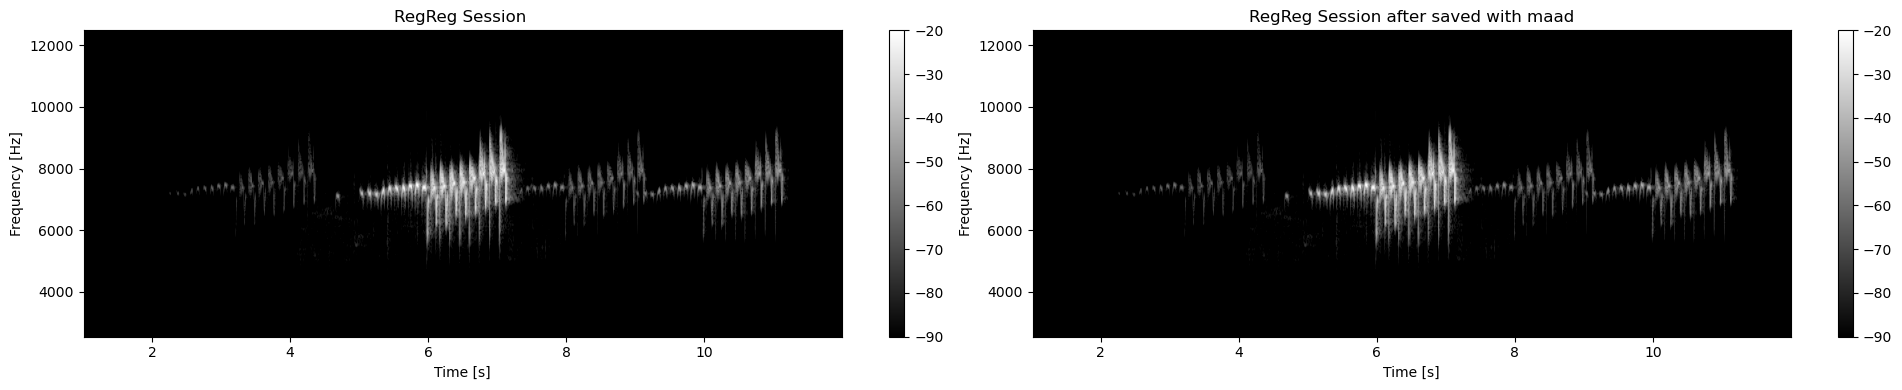

In [135]:
fig, ax = plt.subplots(1,2, figsize=(20,4))

# Normalize the sound to -10 dBFS
channel1_vector_norm = sound.normalize(channel1_vector, max_db=-10)

# compute the spectrogram
Sxx, tn, fn, ext = sound.spectrogram(channel1_vector_norm, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,12), flims=(2500,12500))  

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[0], title='RegReg Session ', vmin=-90, vmax=-20)


##### MAAD
# save the sound
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_assemblage_att_norm.wav', SAMPRATE, channel1_vector_norm, 32)

# load orignal sound saved with MAAD
s, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/regreg_assemblage_att_norm.wav')

# compute the spectrogram
Sxx, tn, fn, ext = sound.spectrogram(s, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,12), flims=(2500,12500))   

# display spectrogram
util.plot_spectrogram(Sxx, ext, ax=ax[1], title='RegReg Session after saved with maad', vmin=-90, vmax=-20)



In [152]:
# get the version of librosa
import bambird
bambird.__version__

2024-09-23 13:16:16.651285: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 13:16:16.918444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 13:16:16.918543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 13:16:16.955387: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 13:16:17.023150: I tensorflow/core/platform/cpu_feature_guar

'0.3.1a1'

## FRICOE

<Axes: title={'center': 'Spectrogram att + norm '}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

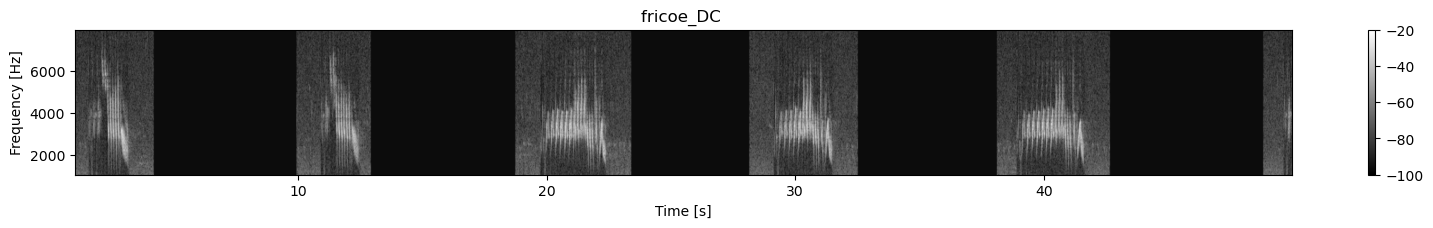

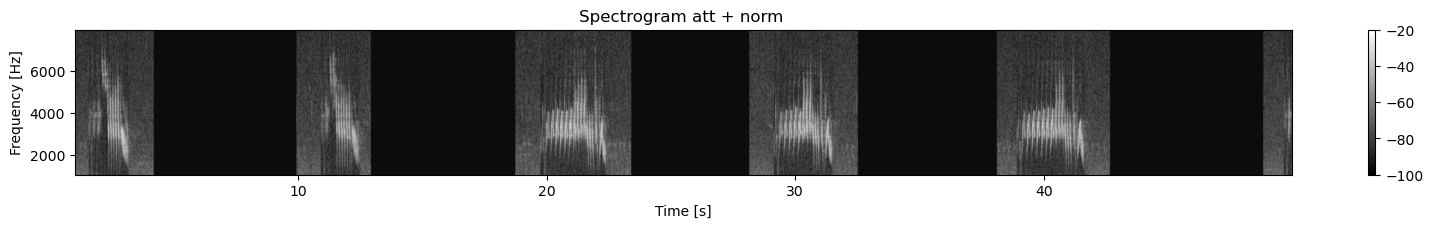

In [149]:
# load orignal sound
s, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/fricoe_DC.wav')

s_norm = sound.normalize(s, max_db=-10)

Sxx, tn, fn, ext = sound.spectrogram(s_norm, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,50), flims=(1000,8000))

# display spectrogram
util.plot_spectrogram(Sxx, ext, title='fricoe_DC ', vmin=-100, vmax=-20)


##### MAAD
# save the sound
sound.write('/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/fricoe_DC_saved_maad.wav', SAMPRATE, s, 32)

# load orignal sound saved with MAAD
s, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/fricoe_DC_saved_maad.wav')

s_norm = sound.normalize(s, max_db=-10)

# compute the spectrogram
Sxx, tn, fn, ext = sound.spectrogram(s_norm, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,50), flims=(1000,8000))

# display spectrogram
util.plot_spectrogram(Sxx, ext, title='Spectrogram att + norm ', vmin=-100, vmax=-20)

<Axes: title={'center': 'Spectrogram att + norm '}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

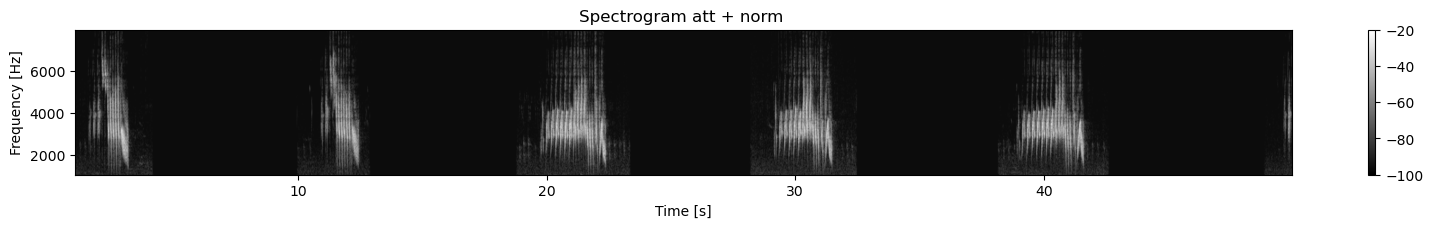

In [144]:
# load orignal sound
s, fs = sound.load(f'/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_soundfiles/test/fricoe_session.wav')

# # apply attenuation
s_att = spl.apply_attenuation(s, fs,r0=1, r=60) 

s_norm = sound.normalize(s_att, max_db=-10)

Sxx, tn, fn, ext = sound.spectrogram(s_norm, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,50), flims=(1000,8000))

# display spectrogram
util.plot_spectrogram(Sxx, ext, title='Spectrogram att + norm ', vmin=-100, vmax=-20)

/media/haupert/data/mes_projets/16_evascape/Evascape_20240405/Evascape_scripts/bird_behavior.py:186: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  song_start = lastsong_df.min_t.loc[bird] = round(random.uniform(0, max_ist), ndigits = 2)
/med

<Axes: title={'center': 'Spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

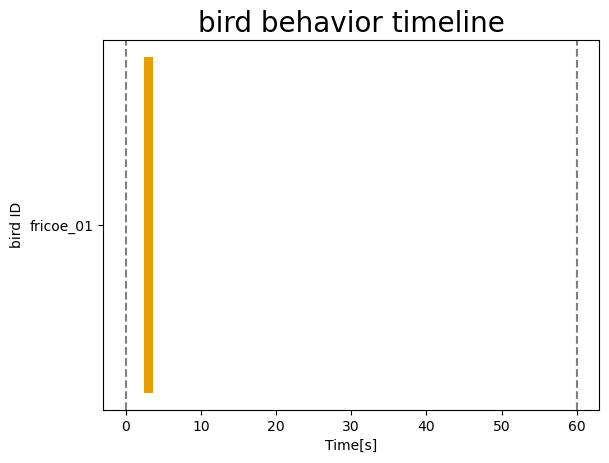

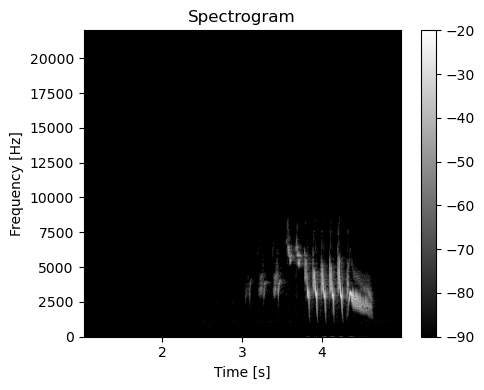

In [138]:
# define the path to the sound files
SOUND_DIR = Path('../Evascape_soundfiles')

SAMPRATE = 44100
DURATION = 60

normch1_df = normsong_df = pd.read_csv(SOUND_DIR / 'bird_channel.csv', sep=';', index_col = 0)
normch2_df = pd.read_csv(SOUND_DIR / 'background_channel.csv', sep=';', index_col = 0)

# select in the index the files that contain the string : MNHN-SO-2016-11232_full_0s_03
normch1_df = normch1_df[normch1_df.index.str.contains('MNHN-SO-2016-5532_extr_0s_03_norm')]

#BIOPHONY DESCRIPTION
########
species_names = ['fricoe']
abundance_df = empty_abundance_dataframe(normch1_df)
abundance_df.loc[species_names] = 1

#BEHAVIOR
#########

random.seed(333)
behavior_df = bird_behavior(normsong_df = normch1_df, 
                            abundance_df = abundance_df, 
                            d_min = 0, 
                            d_max = 100,
                            recording_duration = DURATION,  #behavior algorithm taken from Suzuki et al. 2012
                            all_random_ist = False, # does not take Suzuki's algorithm and makes all intersing intervals random instead
                            duplicate = False,
                            samprate = SAMPRATE)
timeline_chart(behavior_df, y_size = 0.5)

#SINGING SESSION
########
bird_list = list(behavior_df.bird_filename.unique())
species_list =[] 
for bird_filename in bird_list:
    species = behavior_df.categories[behavior_df.bird_filename == bird_filename].unique()[0]
    species_list += [species]
bird_df = pd.DataFrame(bird_list, index = species_list)

fricoe_session = singing_session(behavior_df, bird_df.loc['fricoe'][0], duration = DURATION, samprate = SAMPRATE)

# compute spectrogram
Sxx_fricoe_session, tn, fn, ext = sound.spectrogram(fricoe_session, fs, nperseg=1024, noverlap=512, nfft=1024, tlims=(1,5))

# display spectrogram
util.plot_spectrogram(Sxx_fricoe_session, ext, figsize=(3,5), title='Spectrogram', vmin=-90, vmax=-20)
